<a href="https://colab.research.google.com/github/MahdiNavaei/ARIMA-Model-for-EUR-JPY-Exchange-Rates/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta, time
import scipy
import pylab
import statsmodels.tsa.stattools as sts

In [2]:

# Replace with your Twelve Data API key
api_key = '71e0d66c14b84bf8a094184bbff957d8'

# Define the date range
end_date = datetime.now()
start_date = end_date - timedelta(days=60)

# Set the API endpoint
url = f"https://api.twelvedata.com/time_series?symbol=EUR/JPY&interval=15min&start_date={start_date.isoformat()}&end_date={end_date.isoformat()}&apikey={api_key}"

# Make the API call
response = requests.get(url)
data = response.json()

# Check if the API call was successful
if response.status_code == 200:
    if 'values' in data:
        # Extract the time series data
        time_series_data = data['values']

        # Create a pandas DataFrame
        df = pd.DataFrame(time_series_data)

        # Convert the timestamp to a datetime object
        df['datetime'] = pd.to_datetime(df['datetime'])

        # Save the DataFrame to an Excel file
        df.to_excel('eur_jpy_data_15min.xlsx', index=False)

        print('Data saved to eur_jpy_data_15min.xlsx')
    else:
        print("Error: 'values' not found in the API response")
else:
    print(f"Error {response.status_code}: {data['message']}")

# Convert the 'datetime' column to a datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort the data in descending order based on the datetime column
df.sort_values(by='datetime', ascending=True, inplace=True)

Data saved to eur_jpy_data_15min.xlsx


In [3]:
df.head(30)


,datetime,open,high,low,close
3929,2023-05-11 03:15:00,147.26500,147.28000,147.16499,147.20000
3928,2023-05-11 03:30:00,147.19501,147.20500,147.04500,147.04500
3927,2023-05-11 03:45:00,147.03999,147.25999,147.03999,147.24001
3926,2023-05-11 04:00:00,147.24001,147.33501,147.23000,147.32001
3925,2023-05-11 04:15:00,147.31500,147.39000,147.28500,147.36000
3924,2023-05-11 04:30:00,147.37000,147.41000,147.32001,147.41000
3923,2023-05-11 04:45:00,147.41000,147.42999,147.33501,147.37000
3922,2023-05-11 05:00:00,147.38499,147.50999,147.37000,147.47501
3921,2023-05-11 05:15:00,147.46500,147.59000,147.46500,147.54500
3920,2023-05-11 05:30:00,147.53000,147.60001,147.52000,147.60001


In [4]:
df= pd.DataFrame(df)
# Convert the 'date' column to a datetime format

df['datetime']=pd.to_datetime(df['datetime'])
df

,datetime,open,high,low,close
3929,2023-05-11 03:15:00,147.26500,147.28000,147.16499,147.20000
3928,2023-05-11 03:30:00,147.19501,147.20500,147.04500,147.04500
3927,2023-05-11 03:45:00,147.03999,147.25999,147.03999,147.24001
3926,2023-05-11 04:00:00,147.24001,147.33501,147.23000,147.32001
3925,2023-05-11 04:15:00,147.31500,147.39000,147.28500,147.36000
...,...,...,...,...,...
4,2023-07-08 05:45:00,155.85001,155.87000,155.81000,155.86000
3,2023-07-08 06:00:00,155.88000,155.89000,155.83000,155.86250
2,2023-07-08 06:15:00,155.86099,155.88000,155.81000,155.81000
1,2023-07-08 06:30:00,155.81000,155.85001,155.80850,155.82001


In [5]:
# Drop the 'ticker' column from the DataFrame

#df=df.drop('ticker',axis=1)

df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)

In [6]:
df['datetime'] = df['datetime'].dt.strftime('%d-%m-%Y %H:%M:%S')
# Set the index to the 'date' column

df.set_index('datetime',inplace=True)
df

,open,high,low,close
datetime,,,,
11-05-2023 03:15:00,147.26500,147.28000,147.16499,147.20000
11-05-2023 03:30:00,147.19501,147.20500,147.04500,147.04500
11-05-2023 03:45:00,147.03999,147.25999,147.03999,147.24001
11-05-2023 04:00:00,147.24001,147.33501,147.23000,147.32001
11-05-2023 04:15:00,147.31500,147.39000,147.28500,147.36000
...,...,...,...,...
08-07-2023 05:45:00,155.85001,155.87000,155.81000,155.86000
08-07-2023 06:00:00,155.88000,155.89000,155.83000,155.86250
08-07-2023 06:15:00,155.86099,155.88000,155.81000,155.81000


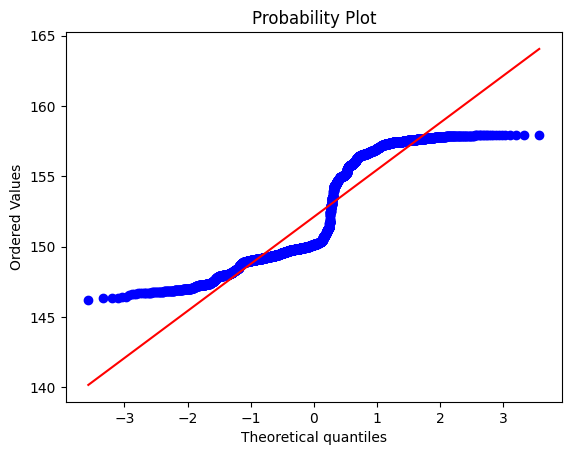

In [7]:
# Plot the high values of the DataFrame using a probability plot

scipy.stats.probplot(df.close,plot=pylab)
pylab.show()

In [8]:
sts.adfuller(df.high)


(-0.8075793622882009,
 0.8168855424360295,
 9,
 3920,
 {'1%': -3.432019282477582,
  '5%': -2.862277597629522,
  '10%': -2.5671626317810285},
 -9578.584698194929)

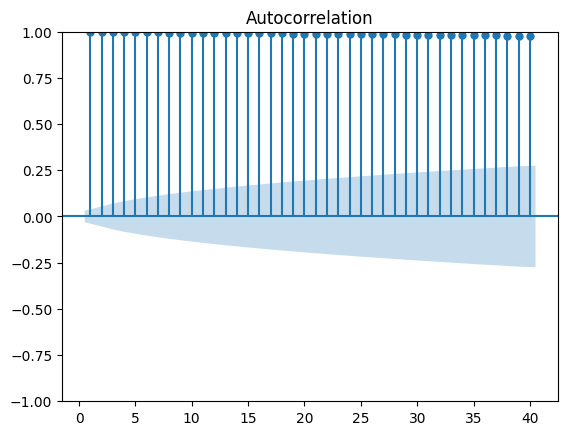

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
#acf Plot
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df.high,lags=40,zero=False)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


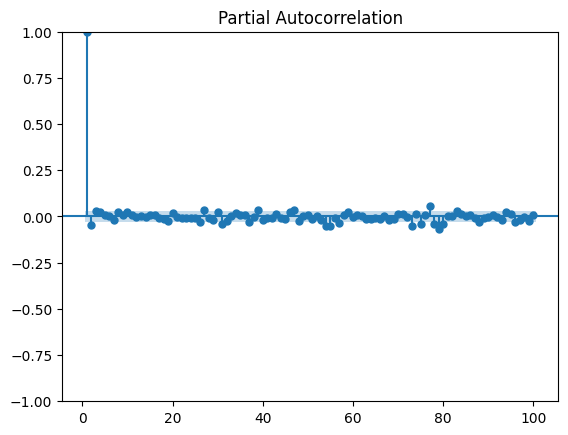

In [10]:

#pacf Plot

sgt.plot_pacf(df.high,lags=100,zero=False)
plt.show()


In [11]:
size= int(len(df)*0.8)
train= df.iloc[:size,:]
test=df.iloc[size:,:]
train


,open,high,low,close
datetime,,,,
11-05-2023 03:15:00,147.26500,147.28000,147.16499,147.20000
11-05-2023 03:30:00,147.19501,147.20500,147.04500,147.04500
11-05-2023 03:45:00,147.03999,147.25999,147.03999,147.24001
11-05-2023 04:00:00,147.24001,147.33501,147.23000,147.32001
11-05-2023 04:15:00,147.31500,147.39000,147.28500,147.36000
...,...,...,...,...
28-06-2023 01:15:00,157.82001,157.88000,157.80000,157.81000
28-06-2023 01:30:00,157.81000,157.84000,157.75000,157.83000
28-06-2023 01:45:00,157.84000,157.84000,157.78000,157.83000


In [12]:
test

,open,high,low,close
datetime,,,,
28-06-2023 02:30:00,157.75000,157.77150,157.73000,157.75999
28-06-2023 02:45:00,157.75999,157.80000,157.74001,157.78999
28-06-2023 03:00:00,157.78050,157.85001,157.78000,157.84000
28-06-2023 03:15:00,157.84000,157.84550,157.78999,157.80000
28-06-2023 03:30:00,157.81000,157.86000,157.78999,157.86000
...,...,...,...,...
08-07-2023 05:45:00,155.85001,155.87000,155.81000,155.86000
08-07-2023 06:00:00,155.88000,155.89000,155.83000,155.86250
08-07-2023 06:15:00,155.86099,155.88000,155.81000,155.81000


In [13]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train.high,order=(2,1,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [14]:
result= model.fit()
result.summary()
#-7252.113

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   high   No. Observations:                 3144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                3803.108
Date:                Sun, 09 Jul 2023   AIC                          -7596.216
Time:                        17:14:04   BIC                          -7565.951
Sample:                             0   HQIC                         -7585.356
                               - 3144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4852      0.230      2.114      0.035       0.035       0.935
ar.L2         -0.3439      0.142     -2.427      0.015      -0.622      -0.066
ma.L1         -0.4156      0.231     -1.797      0.072      -0.869       0.038
ma.L2          0.2776      0.148      1.869      0.062      -0.013       0.569
sigma2         0.0052   5.04e-05    103.180      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             24925.95
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

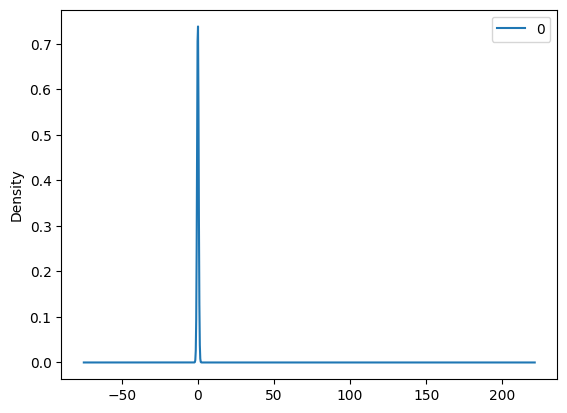

In [15]:
resid= result.resid
re= pd.DataFrame(resid)
re.plot(kind='kde')
plt.show()

In [23]:
# Predict the values for the test data
start = test.index[0]
end = test.index[-1]
history = [x for x in train.high]
n_steps = 9
pred = []

for t in range(len(test.high[start:end])):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 2))
    result = model.fit()

    # Predict the next n_steps values
    forecast = result.forecast(steps=n_steps)[0]
    #yhat=forecast[0]
    pred.append(forecast)

    # Update the history with the observed values
    obs = test.high[t]
    history.append(obs)



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

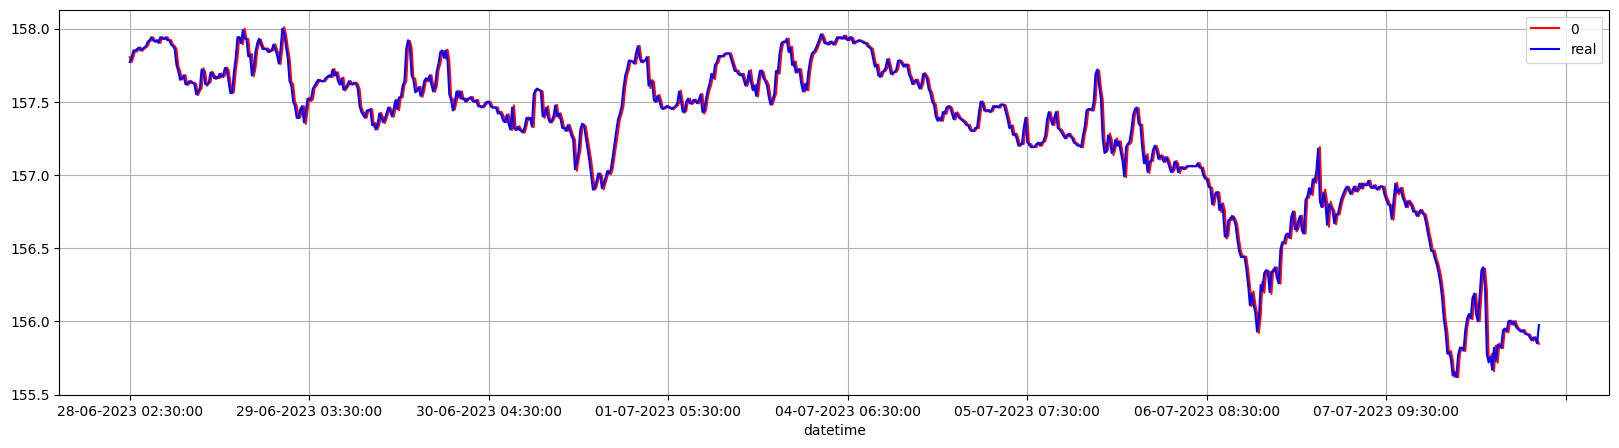

In [29]:
pred= pd.DataFrame(pred,index=test[start:end].index)
pred.plot(figsize=(20,5),c='r',label='predict')
test.high[start:end].plot(figsize=(20,5),c='b',label='real')
plt.grid()
plt.legend()


In [25]:
# predict one step for High
input_samples =test.high[-1:]

input_samples

datetime
08-07-2023 06:45:00    155.97519
Name: high, dtype: float64